In [18]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

# Algorithms
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from itertools import cycle # Meanshift plotting
from sklearn.cluster import SpectralClustering

# Clustering preprocessing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Clustering postprocessing
from scipy.stats import mode

In [2]:
# Import Data
# Data needs to be manually retireved from kaggle with the csv files being renamed accordingly.

data_dav = pd.read_csv('dav_heart_disease_dataset.csv') # https://www.kaggle.com/johnsmith88/heart-disease-dataset
data_sav = pd.read_csv('sve_cardio_dataset.csv', delimiter = ';') # https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [3]:
# Create data and target arrays
x_dav = data_dav.drop('target', axis = 1)
y_dav = data_dav['target']

x_sav = data_sav.drop('cardio', axis = 1)
y_sav = data_sav['cardio']

# Split the data
xtrn_dav, xtst_dav, ytrn_dav, ytst_dav = train_test_split(x_dav, y_dav, test_size=0.20, random_state = 0)

xtrn_sav, xtst_sav, ytrn_sav, ytst_sav = train_test_split(x_sav, y_sav, test_size=0.20, random_state = 0)

# Normalize
dav_scaler = StandardScaler()
xtrn_dav_n = dav_scaler.fit_transform(xtrn_dav)
xtst_dav_n = dav_scaler.transform(xtst_dav)

sav_scaler = StandardScaler()
xtrn_sav_n = sav_scaler.fit_transform(xtrn_sav)
xtst_sav_n = sav_scaler.transform(xtst_sav)

In [4]:
# SVC
svc_dav = SVC()
svc_dav.fit(xtrn_dav_n, ytrn_dav)
svc_dav_predict = svc_dav.predict(xtst_dav_n)
svc_dav_conf_mat = confusion_matrix(ytst_dav, svc_dav_predict)
svc_dav_acc = accuracy_score(ytst_dav, svc_dav_predict)

print("Dav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(svc_dav_conf_mat, svc_dav_acc*100))
print(classification_report(ytst_dav,svc_dav_predict))

svc_sav = SVC()
svc_sav.fit(xtrn_sav_n, ytrn_sav)
svc_sav_predict = svc_sav.predict(xtst_sav_n)
svc_sav_conf_mat = confusion_matrix(ytst_sav, svc_sav_predict)
svc_sav_acc = accuracy_score(ytst_sav, svc_sav_predict)

print("Sav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(svc_sav_conf_mat, svc_sav_acc*100))
print(classification_report(ytst_sav,svc_sav_predict))

Dav set
Confusion Matrix
[[ 92   6]
 [  1 106]]

Accuracy
96.58536585365853

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        98
           1       0.95      0.99      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205

Sav set
Confusion Matrix
[[5401 1668]
 [2158 4773]]

Accuracy
72.67142857142858

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      7069
           1       0.74      0.69      0.71      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [5]:
# K nearest
knn_dav = KNeighborsClassifier(n_neighbors=10)
knn_dav.fit(xtrn_dav_n, ytrn_dav)
knn_dav_predict = knn_dav.predict(xtst_dav_n)
knn_dav_conf_mat = confusion_matrix(ytst_dav, knn_dav_predict)
knn_dav_acc = accuracy_score(ytst_dav, knn_dav_predict)

print("Dav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(knn_dav_conf_mat, knn_dav_acc*100))
print(classification_report(ytst_dav,knn_dav_predict))

knn_sav = KNeighborsClassifier(n_neighbors=10)
knn_sav.fit(xtrn_sav_n, ytrn_sav)
knn_sav_predict = knn_sav.predict(xtst_sav_n)
knn_sav_conf_mat = confusion_matrix(ytst_sav, knn_sav_predict)
knn_sav_acc = accuracy_score(ytst_sav, knn_sav_predict)

print("Sav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(knn_sav_conf_mat, knn_sav_acc*100))
print(classification_report(ytst_sav,knn_sav_predict))

Dav set
Confusion Matrix
[[84 14]
 [11 96]]

Accuracy
87.8048780487805

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205

Sav set
Confusion Matrix
[[5232 1837]
 [3204 3727]]

Accuracy
63.99285714285714

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      7069
           1       0.67      0.54      0.60      6931

    accuracy                           0.64     14000
   macro avg       0.65      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



In [6]:
# Gaussian Naive Bayes
gnb_dav = GaussianNB()
gnb_dav.fit(xtrn_dav_n, ytrn_dav)
gnb_dav_predict = gnb_dav.predict(xtst_dav_n)
gnb_dav_conf_mat = confusion_matrix(ytst_dav, gnb_dav_predict)
gnb_dav_acc = accuracy_score(ytst_dav, gnb_dav_predict)

print("Dav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(gnb_dav_conf_mat, gnb_dav_acc*100))
print(classification_report(ytst_dav,gnb_dav_predict))

gnb_sav = GaussianNB()
gnb_sav.fit(xtrn_sav_n, ytrn_sav)
gnb_sav_predict = gnb_sav.predict(xtst_sav_n)
gnb_sav_conf_mat = confusion_matrix(ytst_sav, gnb_sav_predict)
gnb_sav_acc = accuracy_score(ytst_sav, gnb_sav_predict)

print("Sav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(gnb_sav_conf_mat, gnb_sav_acc*100))
print(classification_report(ytst_sav,gnb_sav_predict))

Dav set
Confusion Matrix
[[79 19]
 [11 96]]

Accuracy
85.36585365853658

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

Sav set
Confusion Matrix
[[6332  737]
 [5017 1914]]

Accuracy
58.9

              precision    recall  f1-score   support

           0       0.56      0.90      0.69      7069
           1       0.72      0.28      0.40      6931

    accuracy                           0.59     14000
   macro avg       0.64      0.59      0.54     14000
weighted avg       0.64      0.59      0.54     14000



In [7]:
# Decision Trees
dtre_dav = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dtre_dav.fit(xtrn_dav_n, ytrn_dav)
dtre_dav_predict = dtre_dav.predict(xtst_dav_n)
dtre_dav_conf_mat = confusion_matrix(ytst_dav, dtre_dav_predict)
dtre_dav_acc = accuracy_score(ytst_dav, dtre_dav_predict)

print("Dav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(dtre_dav_conf_mat, dtre_dav_acc*100))
print(classification_report(ytst_dav,dtre_dav_predict))

dtre_sav = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dtre_sav.fit(xtrn_sav_n, ytrn_sav)
dtre_sav_predict = dtre_sav.predict(xtst_sav_n)
dtre_sav_conf_mat = confusion_matrix(ytst_sav, dtre_sav_predict)
dtre_sav_acc = accuracy_score(ytst_sav, dtre_sav_predict)

print("Sav set")
print("Confusion Matrix\n{}\n\nAccuracy\n{}\n".format(dtre_sav_conf_mat, dtre_sav_acc*100))
print(classification_report(ytst_sav, dtre_sav_predict))

Dav set
Confusion Matrix
[[95  3]
 [ 8 99]]

Accuracy
94.6341463414634

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

Sav set
Confusion Matrix
[[5653 1416]
 [2360 4571]]

Accuracy
73.02857142857142

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7069
           1       0.76      0.66      0.71      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [33]:
# Cluserting preprocessing
dav_cluster = scale(x_dav)
sav_cluster = scale(x_sav)

n_comp_dav = len(np.unique(y_dav))
n_comp_sav = len(np.unique(y_sav))

pca_dav = PCA(n_components=n_comp_dav).fit_transform(dav_cluster)
pca_sav = PCA(n_components=n_comp_sav).fit_transform(sav_cluster)

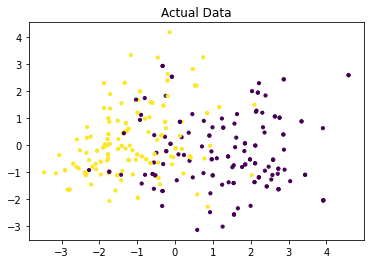

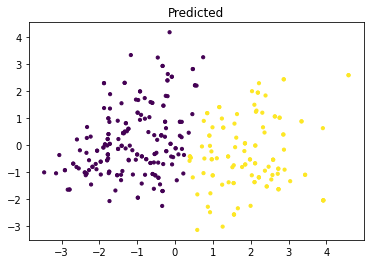

Confusion matrix
 [[ 42 103]
 [149  14]]
Accuracy
 18.181818181818183
              precision    recall  f1-score   support

           0       0.22      0.29      0.25       145
           1       0.12      0.09      0.10       163

    accuracy                           0.18       308
   macro avg       0.17      0.19      0.17       308
weighted avg       0.17      0.18      0.17       308



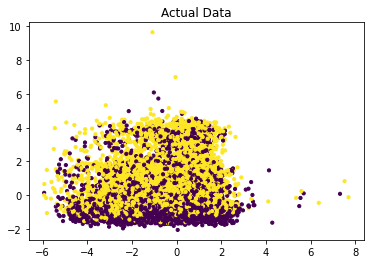

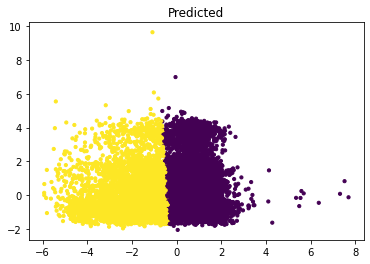

Confusion matrix
 [[7265 3274]
 [6951 3510]]
Accuracy
 51.3095238095238
              precision    recall  f1-score   support

           0       0.51      0.69      0.59     10539
           1       0.52      0.34      0.41     10461

    accuracy                           0.51     21000
   macro avg       0.51      0.51      0.50     21000
weighted avg       0.51      0.51      0.50     21000



In [34]:
# K Means
# Code was rewritten into a function to reduce workload associated in visualizing the clustering algorithms
def kMeans(data, labels):
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.30, random_state=0)
    KModel = KMeans(n_clusters = 2, random_state = 9).fit(Xtrain, ytrain)
    predictions = KModel.predict(Xtest)
    
    plt.title('Actual Data')
    plt.scatter(Xtest[:,0], Xtest[:,1], marker = 'o', s = 10, c = ytest)
    plt.show()
    
    plt.title('Predicted')
    plt.scatter(Xtest[:,0], Xtest[:,1], marker = 'o', s = 10, c = predictions)
    plt.show()

    print("Confusion matrix\n", confusion_matrix(ytest, predictions))
    print("Accuracy\n", accuracy_score(ytest, predictions)*100)
    print(classification_report(ytest, predictions))
    
kMeans(pca_dav, y_dav)
kMeans(pca_sav, y_sav)

In [ ]:
# Mean-Shift - Implementation in progress
'''
ms_dav = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_dav.fit(xtrn_dav)
labels = ms_dav.labels_
cluster_centers = ms_dav.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Dav set Estimated number of clusters: %d' % n_clusters_)
plt.show()
'''


In [ ]:
# Spectral Clustering
def spectralClust(data, labels):
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.30, random_state=0)
    specCl = SpectralClustering(n_clusters = 2, affinity='nearest_neighbors', assign_labels='kmeans').fit(Xtrain, ytrain)
    predictions = specCl.fit_predict(Xtest)
    
    plt.title('Actual Data')
    plt.scatter(Xtest[:,0], Xtest[:,1], marker = 'o', s = 10, c = ytest)
    plt.show()
    
    plt.title('Predicted')
    plt.scatter(Xtest[:,0], Xtest[:,1], marker = 'o', s = 10, c = predictions)
    plt.show()

    print("Confusion matrix\n", confusion_matrix(ytest, predictions))
    print("Accuracy\n", accuracy_score(ytest, predictions)*100)
    print(classification_report(ytest, predictions))
    
spectralClust(pca_dav, y_dav)
spectralClust(pca_sav, y_sav)